In [1]:
#import our Neural Net with 3 layers. Change path depending on where the script is located
exec(open("../Utilities/NNx3.py").read())
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('winequality_red_Train.csv')
dfTest = pd.read_csv('winequality_red_Test.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


In [4]:
#check the data is clean of null values. if we see 0 then we are good
df.isnull().values.sum()

0

In [5]:
df['bad'] = 0
df['average'] = 0
df['good'] = 0
#for each row, if quality is between range, then bad, average good = this thing
for idx, row in enumerate(df['quality']):
    if(row < 5):
        df.loc[idx,'bad'] = 1
    elif(row >6):
        df.loc[idx,'good'] = 1
    else:
        df.loc[idx,'average'] = 1


In [13]:
# Get labels
y = df[['bad','average','good']].values



# Get inputs; we define our x and y here.
X = df.drop(['quality', 'bad','average','good'], axis = 1)

X.shape, y.shape # Print shapes just to check
X = X.values

inputDimensions = 11
hiddenDimensions = 5
outputDimensions = 3

In [14]:
#need to make random start from a base of 0
np.random.seed(0)
#epochs is one full training forward and back propagation
#LEarning rate is hoow rapidly the parameters change
# This is what we return at the end
model = initialise_parameters(nn_input_dim=inputDimensions, nn_hdim= hiddenDimensions, nn_output_dim= outputDimensions)

Loss after iteration 0 : 0.8174295456322679
Accuracy after iteration 0 : 82.32154769846565 %
Loss after iteration 100 : 0.5571094768497864
Accuracy after iteration 100 : 82.32154769846565 %
Loss after iteration 200 : 0.55672012824998
Accuracy after iteration 200 : 82.32154769846565 %
Loss after iteration 300 : 0.5567066241319443
Accuracy after iteration 300 : 82.32154769846565 %
Loss after iteration 400 : 0.5567035088221697
Accuracy after iteration 400 : 82.32154769846565 %
Loss after iteration 500 : 0.5567020425454232
Accuracy after iteration 500 : 82.32154769846565 %
Loss after iteration 600 : 0.5567013247251897
Accuracy after iteration 600 : 82.32154769846565 %
Loss after iteration 700 : 0.5567009656370087
Accuracy after iteration 700 : 82.32154769846565 %
Loss after iteration 800 : 0.5567007692229653
Accuracy after iteration 800 : 82.32154769846565 %
Loss after iteration 900 : 0.556700643024791
Accuracy after iteration 900 : 82.32154769846565 %
Loss after iteration 1000 : 0.5567005

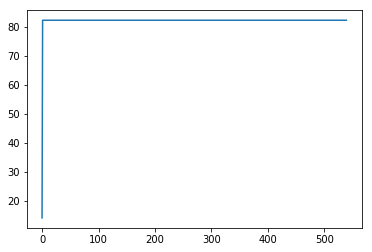

In [15]:
model = train(model,X,y,learning_rate=0.07,epochs=4500,print_loss=True)
plt.plot(losses)

In [25]:
dfTest['bad'] = 0
dfTest['average'] = 0
dfTest['good'] = 0
#for each row, if quality is between range, then bad, average good = this thing
for idx, row in enumerate(dfTest['quality']):
    if(row < 5):
        dfTest.loc[idx,'bad'] = 1
    elif(row >6):
        dfTest.loc[idx,'good'] = 1
    else:
        dfTest.loc[idx,'average'] = 1

In [26]:
# Get labels
yTest = dfTest[['bad','average','good']].values

# Get inputs; we define our x and y here.
XTest = dfTest.drop(['bad','average','good'], axis = 1)
XTest.shape, yTest.shape # Print shapes just to check
XTest = XTest.values

In [27]:
yTest = predict(model,XTest)

In [28]:
#change the test answers data array into a 1d array that can be compared for measuring the accuracy
answersArray = []
for index, row in dfTest[['bad','average','good']].iterrows():
    #print(str(index) +" : "+str((row.values)))
    finalValue = 0;
    for idx, num in enumerate(row.values):
        correctedNum = idx*num
        finalValue += correctedNum
    answersArray.append(finalValue)
    #print(str(index) +":" +str(finalValue))

In [29]:
#The predicted answers
yTest

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
#the real answers
np.array(answersArray)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [31]:
#runn an accuracy score between the predicted numbers and real answers.
accuracy_score(answersArray, yTest)

0.85